## Referencias

Para completar el trabajo de este notebook, se recomienda ver el material siguiente:
- Videos Youtube: Curso de Andrew Ng sobre la Regresion Logística
    - https://www.youtube.com/watch?v=-la3q9d7AKQ (Lecture 6.1 — Logistic Regression | Classification : 8 minutes)
    - https://www.youtube.com/watch?v=t1IT5hZfS48 (Lecture 6.2 — Logistic Regression | Hypothesis Representation : 7 minutes)
    - https://www.youtube.com/watch?v=F_VG4LNjZZw (Lecture 6.3 — Logistic Regression | Decision Boundary : 14 minutes)
    - https://www.youtube.com/watch?v=HIQlmHxI6-0 (Lecture 6.4 — Logistic Regression | Cost Function : 11 minutes)
    - https://www.youtube.com/watch?v=TTdcc21Ko9A (Lecture 6.5 — Logistic Regression | Simplified Cost Function And Gradient Descent : 10 minutes)

## Notebook 5: Regresión Logística - Un tutorial sobre Stochastic Gradient Descent

## Introducción

La regresión logística es el algoritmo de clasificación lineal para problemas de dos clases.

En este tutorial, descubrirá cómo implementar la regresión logística con el descenso de gradiente estocástico (stochastic gradient descent) desde cero con Python.

Después de completar este tutorial, usted sabrá:

- Cómo hacer predicciones con un modelo de regresión logística.
- Cómo estimar los coeficientes utilizando el descenso de gradiente estocástico.
- Cómo aplicar la regresión logística a un problema real de predicción.


## Descripción

Esta sección dará una breve descripción de la técnica de regresión logística, el descenso por gradiente estocástico y el dataset "diabetes" que utilizaremos en este tutorial.

## Logistic Regression

La regresión logística se denomina así por la función utilizada en el núcleo del método, la función logística.

La regresión logística utiliza una ecuación como representación, muy similar a la regresión lineal. Los valores de entrada (X) se combinan linealmente utilizando pesos o valores de coeficiente para predecir un valor de salida (y).

Una diferencia clave con respecto a la regresión lineal es que el valor de salida que se está modelando es un valor binario (0 ó 1) en lugar de un valor numérico.

<h3>

\begin{equation*}
\hat{y} = \frac {e^{(b_{0} + b_{1}x_{1})} }{1 + e^{(b_{0} + b_{1}x_{1})}}
\end{equation*}</h3>

Esto puede simplificarse como:


<h3>
\begin{equation*}
\hat{y} =\frac {1} {1 + e^{-(b_0 + b_1 * x_1)}}
\end{equation*}</h3>

Donde <b>$e$</b> es la base de los logaritmos naturales (el número de Euler), <b>$\hat{y}$</b> es el resultado previsto, <b>$b_0$</b> es el sesgo o término de intercepción y <b>$b_1$</b> es el coeficiente para el valor de entrada simple (<b>$x_{1}$</b>).

La predicción <b>$\hat{y}$</b> es un valor real entre 0 y 1, que necesita ser redondeado a un valor entero y mapeado a un valor de clase predicho.

Cada columna de los datos de entrada tiene un coeficiente <b>$b$</b> asociado (un valor real constante) que debe aprenderse de los datos de entrenamiento. La representación real del modelo que almacenarías en memoria o en un archivo son los coeficientes de la ecuación.

Los coeficientes del algoritmo de regresión logística deben estimarse a partir de los datos de entrenamiento.

## Descenso estocástico por gradiente (Stochastic Gradient Descent)

El descenso por gradiente es el proceso de minimizar una función siguiendo los gradientes de la función de coste.

Esto implica conocer la forma del coste así como la derivada para que desde un punto dado conozcas la pendiente y puedas moverte en esa dirección, por ejemplo, cuesta abajo hacia el valor mínimo.

En el aprendizaje automático, podemos utilizar una técnica que evalúa y actualiza los coeficientes en cada iteración llamada descenso estocástico de gradiente para minimizar el error de un modelo en nuestros datos de entrenamiento.

La forma en que funciona este algoritmo de optimización es que cada instancia de entrenamiento se muestra al modelo una por una. El modelo hace una predicción para una instancia de entrenamiento, se calcula el error y se actualiza el modelo para reducir el error para la siguiente predicción.

Este procedimiento se puede utilizar para encontrar el conjunto de coeficientes en un modelo que da como resultado el menor error para el modelo en los datos de entrenamiento. En cada iteración, los coeficientes (b) se actualizan utilizando la ecuación:

<code>b = b + learning_rate * (y - yhat) * yhat * (1 - yhat) * x</code>

Donde <b>b</b> es el coeficiente o peso que se está optimizando, <b>learning_rate</b> es una velocidad de aprendizaje que se debe configurar (por ejemplo, 0.01), <b>(y - yhat)</b> es el error de predicción para el modelo en los datos de entrenamiento atribuidos al peso, <b>yhat</b> es la predicción hecha por los coeficientes y <b>x</b> es el valor de entrada.

## Dataset y Problema de clasificación

El dataset "diabetes.csv" consiste en predecir el inicio de la diabetes en un plazo de 5 años en los indios Pima a los que se les dan detalles médicos básicos.

Es un problema de clasificación binaria, donde la predicción es 0 (sin diabetes) o 1 (diabetes).

Contiene 768 filas y 9 columnas. Todos los valores en el archivo son numéricos, específicamente valores en coma flotante. Abajo hay una pequeña muestra de las primeras filas del problema.

<code>6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...</code>

## Tutorial

Este tutorial está dividido en 3 partes.

    - Hacer predicciones.
    - Estimar los Coeficientes de la regresión logística
    - Predecir el diabete.

Esto le proporcionará la base que necesita para implementar y aplicar la regresión logística con descenso de gradiente estocástico sobre sus propios problemas de modelado predictivo.

### 1. Hacer predicciones

El primer paso es desarrollar una función que pueda hacer predicciones.

Esto será necesario tanto en la evaluación de los valores de los coeficientes candidatos en el descenso del gradiente estocástico como después de que se finalice el modelo y queramos empezar a hacer predicciones sobre los datos de prueba o nuevos datos.

Abajo hay una función llamada predict() que predice un valor de salida para una fila con un conjunto de coeficientes.

El primer coeficiente en es siempre la intercepción, también llamado el sesgo o b0 ya que es independiente y no es responsable de un valor de entrada específico.

In [1]:
from math import exp

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

Podemos crear un pequeño conjunto de datos para probar nuestra función predict().

In [2]:
# test predictions
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

<b>PREGUNTA:</b>

con Pandas y Matplotlib, construir un gráfico en dos dimensiones (x1 y x2), posicionando cada punto del dataset y diferenciando los puntos de cada clase.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

axes = plt.axes()
axes.grid()
for data in dataset:
    x1=data[0]
    x2=data[1]
    y=data[2]
    if y==1:
        plt.scatter(x1,x2,s=200,c="r",alpha=0.5,label="y=1")
    else:
        plt.scatter(x1,x2,s=200,c="b",alpha=0.5,label="y=0")

        
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

<Figure size 640x480 with 1 Axes>

Podemos usar coeficientes (b0, b1, b2) previamente preparados para hacer predicciones para este conjunto de datos:

In [4]:
coef = [-0.406605464, 0.852573316, -1.104746259]

Poniendo todo esto junto podemos probar nuestra función predict() a continuación.

In [5]:
predicted=[]
expected=[]
for row in dataset:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f [%d]" % (row[-1], yhat, round(yhat)))
    predicted.append(round(yhat))
    expected.append(row[-1])

Expected=0.000, Predicted=0.299 [0]
Expected=0.000, Predicted=0.146 [0]
Expected=0.000, Predicted=0.085 [0]
Expected=0.000, Predicted=0.220 [0]
Expected=0.000, Predicted=0.247 [0]
Expected=1.000, Predicted=0.955 [1]
Expected=1.000, Predicted=0.862 [1]
Expected=1.000, Predicted=0.972 [1]
Expected=1.000, Predicted=0.999 [1]
Expected=1.000, Predicted=0.905 [1]


<b>PREGUNTA:</b> ¿Cuál es la precisión y el recall de nuestro modelo?

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(expected,predicted)
confusion_matrix


array([[5, 0],
       [0, 5]])

Por supuesto, en la realidad no podemos adivinar los buenos coeficientes b. Necesitamos un metodo para aproximar los mejores coeficientes. Presentamos a continuación el método Stochastic Gradient Descent que apunta a este objetivo. 

## 2. Estimación de los coeficientes

Podemos estimar los valores del coeficiente para nuestros datos de entrenamiento utilizando el descenso de gradiente estocástico.

El descenso estocástico por gradiente requiere dos parámetros:

  - Tasa de Aprendizaje (Learning rate): Se utiliza para limitar el importe que cada coeficiente se corrige cada vez que se actualiza.
  - Épocas (Epochs): El número de veces que se repasan los datos de entrenamiento mientras se actualizan los coeficientes.

Estos, junto con los datos de la formación, serán los argumentos de la función.

Hay 3 bucles que necesitamos realizar en la función:

  - Bucle sobre cada época.
  - Bucle sobre cada fila de los datos de entrenamiento de una época.
  - Bucle sobre cada coeficiente y actualícelo para una fila en una época.

Como puedes ver, actualizamos cada coeficiente para cada fila de los datos de entrenamiento, cada época.

Los coeficientes se actualizan en función del error que cometió el modelo. El error se calcula como la diferencia entre el valor de salida esperado y la predicción realizada con los coeficientes candidatos.

Hay un coeficiente para ponderar cada atributo de entrada, y éstos se actualizan de forma coherente, por ejemplo:

b1(t+1) = b1(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t)) * x1(t)

El coeficiente especial al principio de la lista, también llamado intercepción, se actualiza de forma similar, excepto sin una entrada, ya que no está asociado a un valor de entrada específico:

<code>b0(t+1) = b0(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t))</code>

Ahora podemos juntar todo esto. A continuación se muestra una función llamada <b>coefficients_sgd()</b> que calcula los valores de los coeficientes para un conjunto de datos de entrenamiento utilizando el descenso de gradiente estocástico.

In [7]:
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            sum_error += error**2
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.5f' % (epoch, l_rate, sum_error))
    return coef

Puedes ver, que además, llevamos la cuenta de la suma del error al cuadrado (un valor positivo) de cada época para que podamos imprimir un bonito mensaje en cada bucle exterior.

Podemos probar esta función en el mismo pequeño conjunto de datos creado desde arriba.

In [8]:
# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

Utilizamos una mayor tasa de aprendizaje de 0,3 y entrenamos el modelo para 100 épocas, o 100 exposiciones de los coeficientes a todo el conjunto de datos de entrenamiento.

Al ejecutar el ejemplo se imprime un mensaje en cada época con la suma del error al cuadrado para esa época y el conjunto final de coeficientes.

In [9]:
l_rate = 0.3
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.300, error=2.21683
>epoch=1, lrate=0.300, error=1.61299
>epoch=2, lrate=0.300, error=1.11335
>epoch=3, lrate=0.300, error=0.82678
>epoch=4, lrate=0.300, error=0.62283
>epoch=5, lrate=0.300, error=0.49369
>epoch=6, lrate=0.300, error=0.41176
>epoch=7, lrate=0.300, error=0.35387
>epoch=8, lrate=0.300, error=0.31008
>epoch=9, lrate=0.300, error=0.27553
>epoch=10, lrate=0.300, error=0.24753
>epoch=11, lrate=0.300, error=0.22440
>epoch=12, lrate=0.300, error=0.20500
>epoch=13, lrate=0.300, error=0.18852
>epoch=14, lrate=0.300, error=0.17437
>epoch=15, lrate=0.300, error=0.16211
>epoch=16, lrate=0.300, error=0.15139
>epoch=17, lrate=0.300, error=0.14195
>epoch=18, lrate=0.300, error=0.13358
>epoch=19, lrate=0.300, error=0.12612
>epoch=20, lrate=0.300, error=0.11942
>epoch=21, lrate=0.300, error=0.11338
>epoch=22, lrate=0.300, error=0.10790
>epoch=23, lrate=0.300, error=0.10292
>epoch=24, lrate=0.300, error=0.09837
>epoch=25, lrate=0.300, error=0.09419
>epoch=26, lrate=0.300

In [10]:
l_rate = 1.5
n_epoch = 5000
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=1.500, error=4.20053
>epoch=1, lrate=1.500, error=1.59128
>epoch=2, lrate=1.500, error=2.33207
>epoch=3, lrate=1.500, error=0.08915
>epoch=4, lrate=1.500, error=0.07361
>epoch=5, lrate=1.500, error=0.06068
>epoch=6, lrate=1.500, error=0.05168
>epoch=7, lrate=1.500, error=0.04521
>epoch=8, lrate=1.500, error=0.04028
>epoch=9, lrate=1.500, error=0.03639
>epoch=10, lrate=1.500, error=0.03321
>epoch=11, lrate=1.500, error=0.03057
>epoch=12, lrate=1.500, error=0.02833
>epoch=13, lrate=1.500, error=0.02640
>epoch=14, lrate=1.500, error=0.02473
>epoch=15, lrate=1.500, error=0.02326
>epoch=16, lrate=1.500, error=0.02196
>epoch=17, lrate=1.500, error=0.02080
>epoch=18, lrate=1.500, error=0.01976
>epoch=19, lrate=1.500, error=0.01883
>epoch=20, lrate=1.500, error=0.01797
>epoch=21, lrate=1.500, error=0.01720
>epoch=22, lrate=1.500, error=0.01649
>epoch=23, lrate=1.500, error=0.01583
>epoch=24, lrate=1.500, error=0.01523
>epoch=25, lrate=1.500, error=0.01467
>epoch=26, lrate=1.500

>epoch=1792, lrate=1.500, error=0.00024
>epoch=1793, lrate=1.500, error=0.00024
>epoch=1794, lrate=1.500, error=0.00024
>epoch=1795, lrate=1.500, error=0.00024
>epoch=1796, lrate=1.500, error=0.00024
>epoch=1797, lrate=1.500, error=0.00023
>epoch=1798, lrate=1.500, error=0.00023
>epoch=1799, lrate=1.500, error=0.00023
>epoch=1800, lrate=1.500, error=0.00023
>epoch=1801, lrate=1.500, error=0.00023
>epoch=1802, lrate=1.500, error=0.00023
>epoch=1803, lrate=1.500, error=0.00023
>epoch=1804, lrate=1.500, error=0.00023
>epoch=1805, lrate=1.500, error=0.00023
>epoch=1806, lrate=1.500, error=0.00023
>epoch=1807, lrate=1.500, error=0.00023
>epoch=1808, lrate=1.500, error=0.00023
>epoch=1809, lrate=1.500, error=0.00023
>epoch=1810, lrate=1.500, error=0.00023
>epoch=1811, lrate=1.500, error=0.00023
>epoch=1812, lrate=1.500, error=0.00023
>epoch=1813, lrate=1.500, error=0.00023
>epoch=1814, lrate=1.500, error=0.00023
>epoch=1815, lrate=1.500, error=0.00023
>epoch=1816, lrate=1.500, error=0.00023


>epoch=2291, lrate=1.500, error=0.00018
>epoch=2292, lrate=1.500, error=0.00018
>epoch=2293, lrate=1.500, error=0.00018
>epoch=2294, lrate=1.500, error=0.00018
>epoch=2295, lrate=1.500, error=0.00018
>epoch=2296, lrate=1.500, error=0.00018
>epoch=2297, lrate=1.500, error=0.00018
>epoch=2298, lrate=1.500, error=0.00018
>epoch=2299, lrate=1.500, error=0.00018
>epoch=2300, lrate=1.500, error=0.00018
>epoch=2301, lrate=1.500, error=0.00018
>epoch=2302, lrate=1.500, error=0.00018
>epoch=2303, lrate=1.500, error=0.00018
>epoch=2304, lrate=1.500, error=0.00018
>epoch=2305, lrate=1.500, error=0.00018
>epoch=2306, lrate=1.500, error=0.00018
>epoch=2307, lrate=1.500, error=0.00018
>epoch=2308, lrate=1.500, error=0.00018
>epoch=2309, lrate=1.500, error=0.00018
>epoch=2310, lrate=1.500, error=0.00018
>epoch=2311, lrate=1.500, error=0.00018
>epoch=2312, lrate=1.500, error=0.00018
>epoch=2313, lrate=1.500, error=0.00018
>epoch=2314, lrate=1.500, error=0.00018
>epoch=2315, lrate=1.500, error=0.00018


>epoch=3791, lrate=1.500, error=0.00011
>epoch=3792, lrate=1.500, error=0.00011
>epoch=3793, lrate=1.500, error=0.00011
>epoch=3794, lrate=1.500, error=0.00011
>epoch=3795, lrate=1.500, error=0.00011
>epoch=3796, lrate=1.500, error=0.00011
>epoch=3797, lrate=1.500, error=0.00011
>epoch=3798, lrate=1.500, error=0.00011
>epoch=3799, lrate=1.500, error=0.00011
>epoch=3800, lrate=1.500, error=0.00011
>epoch=3801, lrate=1.500, error=0.00011
>epoch=3802, lrate=1.500, error=0.00011
>epoch=3803, lrate=1.500, error=0.00011
>epoch=3804, lrate=1.500, error=0.00011
>epoch=3805, lrate=1.500, error=0.00011
>epoch=3806, lrate=1.500, error=0.00011
>epoch=3807, lrate=1.500, error=0.00011
>epoch=3808, lrate=1.500, error=0.00011
>epoch=3809, lrate=1.500, error=0.00011
>epoch=3810, lrate=1.500, error=0.00011
>epoch=3811, lrate=1.500, error=0.00011
>epoch=3812, lrate=1.500, error=0.00011
>epoch=3813, lrate=1.500, error=0.00011
>epoch=3814, lrate=1.500, error=0.00011
>epoch=3815, lrate=1.500, error=0.00011


>epoch=4290, lrate=1.500, error=0.00010
>epoch=4291, lrate=1.500, error=0.00010
>epoch=4292, lrate=1.500, error=0.00010
>epoch=4293, lrate=1.500, error=0.00010
>epoch=4294, lrate=1.500, error=0.00010
>epoch=4295, lrate=1.500, error=0.00010
>epoch=4296, lrate=1.500, error=0.00010
>epoch=4297, lrate=1.500, error=0.00010
>epoch=4298, lrate=1.500, error=0.00010
>epoch=4299, lrate=1.500, error=0.00010
>epoch=4300, lrate=1.500, error=0.00010
>epoch=4301, lrate=1.500, error=0.00010
>epoch=4302, lrate=1.500, error=0.00010
>epoch=4303, lrate=1.500, error=0.00010
>epoch=4304, lrate=1.500, error=0.00010
>epoch=4305, lrate=1.500, error=0.00010
>epoch=4306, lrate=1.500, error=0.00010
>epoch=4307, lrate=1.500, error=0.00010
>epoch=4308, lrate=1.500, error=0.00010
>epoch=4309, lrate=1.500, error=0.00010
>epoch=4310, lrate=1.500, error=0.00010
>epoch=4311, lrate=1.500, error=0.00010
>epoch=4312, lrate=1.500, error=0.00010
>epoch=4313, lrate=1.500, error=0.00010
>epoch=4314, lrate=1.500, error=0.00010


Puedes ver cómo el error sigue disminuyendo incluso en la época final. Probablemente podríamos entrenar durante mucho más tiempo (más épocas) o aumentar la cantidad que actualizamos los coeficientes en cada época (ritmo de aprendizaje más alto).

Experimente y vea lo que se le ocurre.

Ahora, apliquemos este algoritmo en un conjunto de datos real.

## 3. Predicción de la diabetes

En esta sección, entrenaremos un modelo de regresión logística utilizando el descenso de gradiente estocástico sobre el conjunto de datos de diabetes.

El ejemplo asume que una copia CSV del conjunto de datos está en el directorio de trabajo actual con el nombre de archivo nb4-diabetes.csv.

El conjunto de datos se carga primero, los valores de las cadenas se convierten a numéricos y cada columna se normaliza a valores en el rango de 0 a 1. Esto se logra con las funciones <code>helper load_csv()</code> y <code>str_column_to_float()</code> para cargar y preparar el dataset y <code>dataset_minmax()</code> y <code>normalize_dataset()</code> para normalizarlo.

Usaremos la validación cruzada de k-fold para estimar el rendimiento del modelo aprendido en datos no vistos. Esto significa que construiremos y evaluaremos los modelos k y estimaremos el rendimiento como el rendimiento medio del modelo. La exactitud de la clasificación se utilizará para evaluar cada modelo. Estos comportamientos se proporcionan en las funciones de ayuda <code>cross_validation_split()</code>, <code>accuracy_metric()</code> y <code>evaluate_algorithm()</code>.

Usaremos las funciones <code>predict()</code>, <code>coefficients_sgd()</code> creadas anteriormente y una nueva función <code>logistic_regression()</code> para entrenar el modelo.

A continuación se muestra el ejemplo completo.

In [27]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp

listaEpoch=list()
listaError=list()
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))
 
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        #print("epoch:"+str(epoch))
        err_avg=0
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            #print("coef_0:"+str(coef[0]))
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
        err_avg=err_avg / len(train)
        if(len(listaEpoch)<n_epoch):
            listaEpoch.append(epoch)
            listaError.append(error)
    return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)
 
# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
filename = 'nb5-diabetes.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm


In [36]:
listaEpoch=list()
listaError=list()
n_folds = 5
l_rate = 0.1
n_epoch = 100
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [74.50980392156863, 73.20261437908496, 78.43137254901961, 81.69934640522875, 76.47058823529412]
Mean Accuracy: 76.863%


Se utilizó un valor k de 5 para la validación cruzada, dando a cada muestra 768/5 = 153,6 o algo más de 150 registros para ser evaluados en cada iteración. Se eligió una tasa de aprendizaje de 0,1 y 100 épocas de entrenamiento con un poco de experimentación.

Puedes probar tus propias configuraciones y ver si puedes superar mi puntuación.

Al ejecutar este ejemplo, se imprimen las puntuaciones de cada uno de los 5 pliegues de validación cruzada y, a continuación, se imprime la precisión de clasificación media.

<b>Pregunta</b>:

Con Pandas y Matplotlib, dibujar una curva que representa la tasa de error de la regresión logística según el epoch.

In [38]:
listaEpoch=[]
listaError=[]
# evaluate algorithm
n_folds = 50
l_rate = 0.5
n_epoch = 1000
myScores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % myScores)
print('Mean Accuracy: %.3f%%' % (sum(myScores)/float(len(myScores))))

Scores: [80.0, 93.33333333333333, 73.33333333333333, 80.0, 73.33333333333333, 73.33333333333333, 86.66666666666667, 66.66666666666666, 86.66666666666667, 80.0, 86.66666666666667, 80.0, 73.33333333333333, 80.0, 80.0, 100.0, 66.66666666666666, 80.0, 66.66666666666666, 66.66666666666666, 93.33333333333333, 73.33333333333333, 60.0, 73.33333333333333, 60.0, 60.0, 73.33333333333333, 73.33333333333333, 80.0, 66.66666666666666, 80.0, 86.66666666666667, 86.66666666666667, 73.33333333333333, 80.0, 66.66666666666666, 93.33333333333333, 80.0, 80.0, 93.33333333333333, 80.0, 80.0, 80.0, 80.0, 66.66666666666666, 73.33333333333333, 80.0, 60.0, 86.66666666666667, 86.66666666666667]
Mean Accuracy: 77.600%


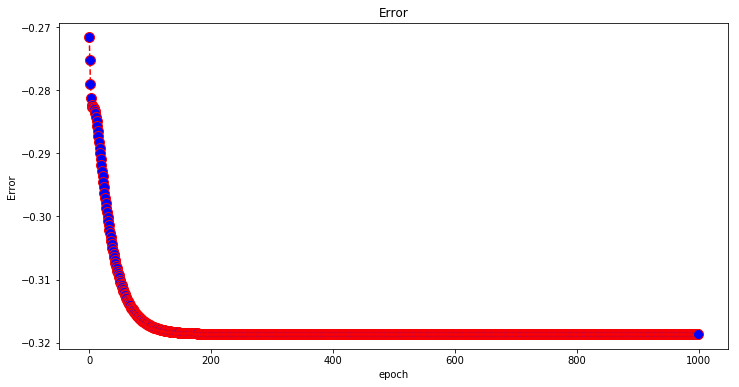

In [39]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))  
plt.plot(listaEpoch,listaError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error')  
plt.xlabel('epoch')  
plt.ylabel('Error')  
plt.show()



